In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import datetime
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential

# convolutional layer 만들기 위한 import
from keras.layers.convolutional import Conv2D, MaxPooling2D

# Dense layer 만들기 위한 import
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import warnings
warnings.filterwarnings("ignore")

In [3]:
PATH = '/content/drive/MyDrive/해커톤_공유폴더/data_mini/'

# Can 모델 생성

## 데이터 준비

In [ ]:
np.random.seed(3)

In [ ]:
# train data 생성하기, ImageDataGenerator 클래스를 사용해서 다양한 데이터 만들기

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# https://tykimos.github.io/2017/06/10/CNN_Data_Augmentation/ 파라미터 설명

train_datagen = ImageDataGenerator(rescale = 1./255, # 픽셀 값 정규화
                                  rotation_range = 30, # 이미지 회전
                                  width_shift_range=0.1, # 수평방향으로 이동
                                  height_shift_range=0.1, # 수직방향으로 이동
                                  shear_range=0.2, 
                                  zoom_range=0.3,# 이미지를 확대/축소
                                  horizontal_flip=True,# 수평방향(좌우)로 뒤집기
                                  vertical_flip=False, # 수직방향(상하)로 뒤집기
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        PATH + 'can_mini/train',  
        target_size=(224, 224),  
        batch_size=128, 
        class_mode='categorical')

Found 1404 images belonging to 7 classes.


In [ ]:
# ImageDataGenerator 이후의 데이터 시각화

original_datagen = ImageDataGenerator(rescale = 1./255)
original_generator = original_datagen.flow_from_directory(PATH + 'can_mini/train', 
                                                          batch_size=128, 
                                                          target_size=(224, 224), 
                                                          class_mode='categorical'
                                                         )

Found 1404 images belonging to 7 classes.


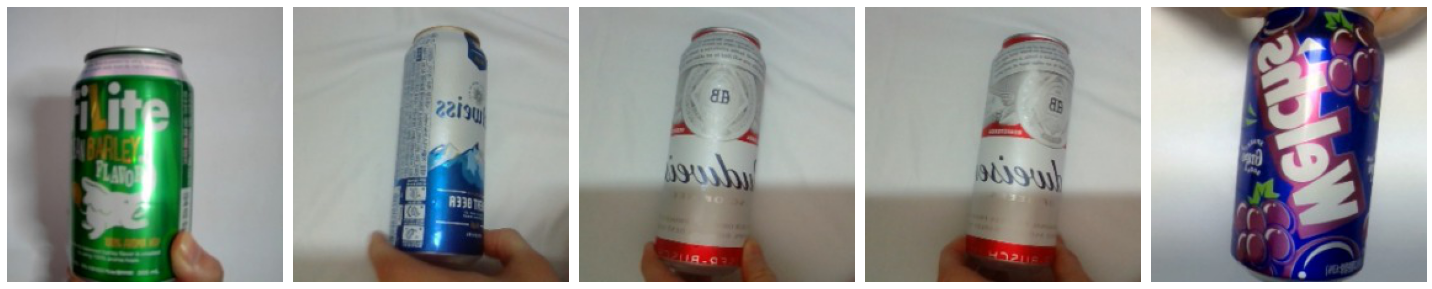

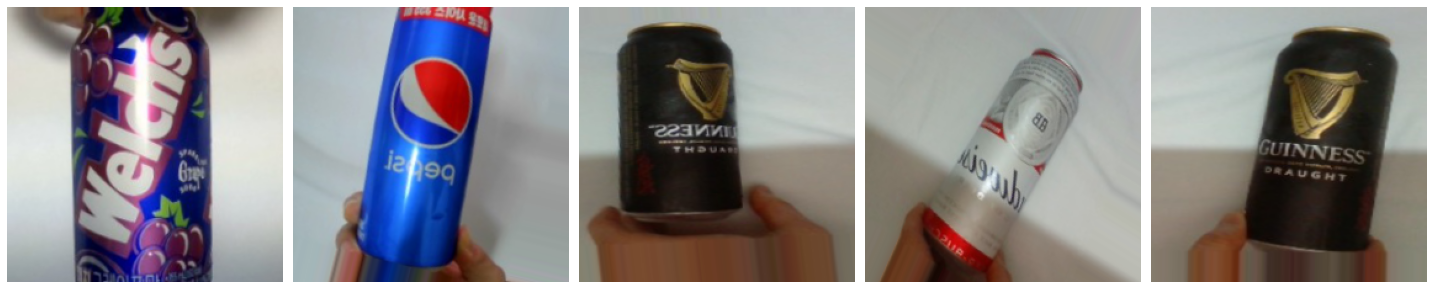

In [ ]:
# 현실에 있을만한 데이터인지 확인하면서 파라미터를 조정해야한다.

original_generator_images, _ = next(original_generator)
train_generator_images, _ = next(train_generator)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(original_generator_images[:5])
plotImages(train_generator_images[:5])

# next 함수는 데이터셋의 배치를 반환한다 
# next 함수의 반환값은 (x, y) 형태이다
# 여기서 x는 학습 특징들(픽셀값)이고 y는 라벨이다
# 학습 데이터만 보여주기 위해서 라벨은 숨긴다

In [ ]:
# validation data 생성

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        PATH + 'can_mini/val',
        target_size=(224, 224),    
        class_mode='categorical',
        batch_size=10)

Found 145 images belonging to 7 classes.


## Build a CNN Model

In [ ]:
# CNN 모델 만들기
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    
    # This is the first convolution layer
    # 컨볼루션 필터의 수, 컨볼루션 커널(=필터)의 (행, 열), 경계 처리 방법, 활성화함수, 첫 레이어일 때만 정의(input_shape)
    tf.keras.layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    # pooling layer. 필터의 (행,열)
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution layer
    tf.keras.layers.Conv2D(64, (3, 3),padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  # ----------------------------------------------------------------------- 여기까지가 이미지의 특징을 잘 추출할 수 있도록 학습되는 부분. (특징 추출 부분)
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    
    tf.keras.layers.Dense(7, activation='softmax')
])
# ---------------------------------------------------------- 이미지를 분류하는 부분



In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 24, 24, 64)      

In [ ]:
# 모델 엮기
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
# 모델 학습
start = datetime.datetime.now()
history = model.fit(
      train_generator, 
      steps_per_epoch=10,  
      epochs=40,
      verbose=1,
      validation_data=validation_generator
      )
end = datetime.datetime.now()
time = end - start
print(f'학습시간 : ', time)

Epoch 1/40
10/10 [==============================] - 20s 2s/step - loss: 1.9209 - accuracy: 0.1661 - val_loss: 1.7787 - val_accuracy: 0.1379
Epoch 2/40
10/10 [==============================] - 19s 2s/step - loss: 1.4565 - accuracy: 0.4161 - val_loss: 1.0411 - val_accuracy: 0.6897
Epoch 3/40
10/10 [==============================] - 19s 2s/step - loss: 0.6808 - accuracy: 0.7837 - val_loss: 0.1302 - val_accuracy: 0.9655
Epoch 4/40
10/10 [==============================] - 19s 2s/step - loss: 0.1901 - accuracy: 0.9459 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 5/40
10/10 [==============================] - 19s 2s/step - loss: 0.0973 - accuracy: 0.9616 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 6/40
10/10 [==============================] - 19s 2s/step - loss: 0.2308 - accuracy: 0.9255 - val_loss: 8.4392e-04 - val_accuracy: 1.0000
Epoch 7/40
10/10 [==============================] - 19s 2s/step - loss: 0.0789 - accuracy: 0.9726 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 8/40
10/10

In [ ]:
# 모델 저장하기
model.save('CNN_can.h5')

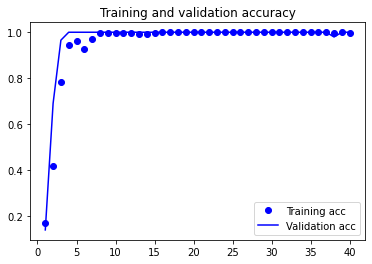

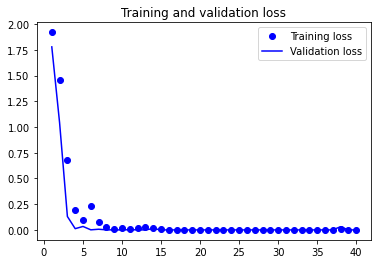

In [ ]:
# acc, loss 시각화

%matplotlib inline
 
import matplotlib.pyplot as plt
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 

In [ ]:
# teset data 준비
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        PATH + 'can_mini/test',
        target_size=(224, 224),
        class_mode='categorical', shuffle=False, seed=0)

Found 14 images belonging to 7 classes.


In [ ]:
# test 결과 확인
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print()
print("-- Predict --")

output = model.predict_generator(test_generator)
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

print(test_generator.class_indices)
print(output)
print(test_generator.filenames)

-- Evaluate --
accuracy: 71.43%

-- Predict --
{'budweiser': 0, 'coca-cola': 1, 'edelweiser': 2, 'filite': 3, 'guinness': 4, 'pepsi': 5, 'welchs': 6}
[[1.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 1.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 1.000 0.000 0.000 0.000 0.000 0.000]
 [0.005 0.000 0.003 0.000 0.000 0.000 0.992]
 [0.021 0.000 0.979 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.404 0.596 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.007 0.993]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000]
 [0.005 0.000 0.022 0.000 0.834 0.000 0.138]
 [0.000 0.000 0.023 0.000 0.000 0.000 0.977]]
['budweiser/budweiser_0.jpeg', 'budweiser/budweiser_1.jpg', 'coca-cola/coca_cola_0.jpg', 'coca-cola/coca_cola_1.jpg', 'edelweiser/edelweiser_0.jpg', 'edelweiser/edelweiser_1.png', 'filite/filite_0.jpg', 'filite/filite_1

# PACK 모델 생성

## 데이터 준비

In [4]:
# train data 생성하기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# https://tykimos.github.io/2017/06/10/CNN_Data_Augmentation/ 파라미터 설명

train_datagen = ImageDataGenerator(rescale = 1./255, # 픽셀 값 정규화
                                  rotation_range = 30, # 이미지 회전
                                  width_shift_range=0.1, # 수평방향으로 이동
                                  height_shift_range=0.1, # 수직방향으로 이동
                                  shear_range=0.2, 
                                  zoom_range=0.3,# 이미지를 확대/축소
                                  horizontal_flip=True,# 수평방향(좌우)로 뒤집기
                                  vertical_flip=False, # 수직방향(상하)로 뒤집기
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        PATH + 'pack_mini/train',  
        target_size=(224, 224),  
        batch_size=128, 
        class_mode='categorical')

Found 2422 images belonging to 12 classes.


In [5]:
# ImageDataGenerator 이후의 데이터 시각화

original_datagen = ImageDataGenerator(rescale = 1./255)
original_generator = original_datagen.flow_from_directory(PATH + 'pack_mini/train', 
                                                          batch_size=128, 
                                                          target_size=(224, 224), 
                                                          class_mode='categorical'
                                                         )

Found 2422 images belonging to 12 classes.


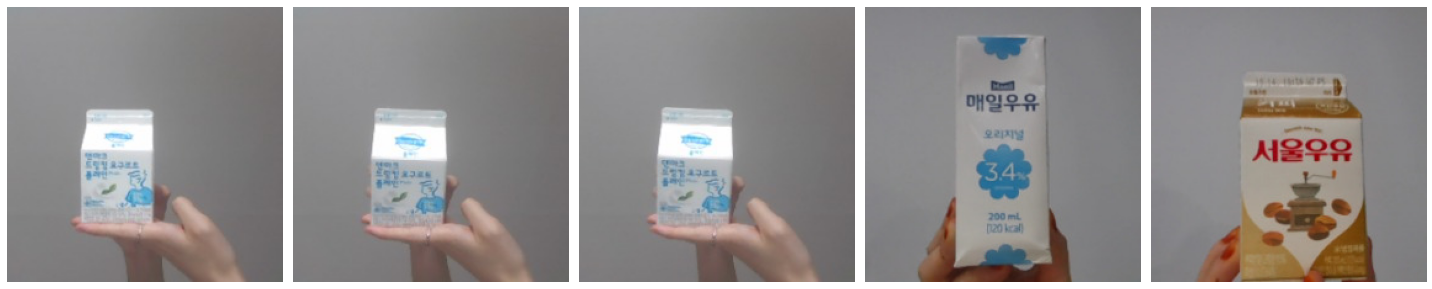

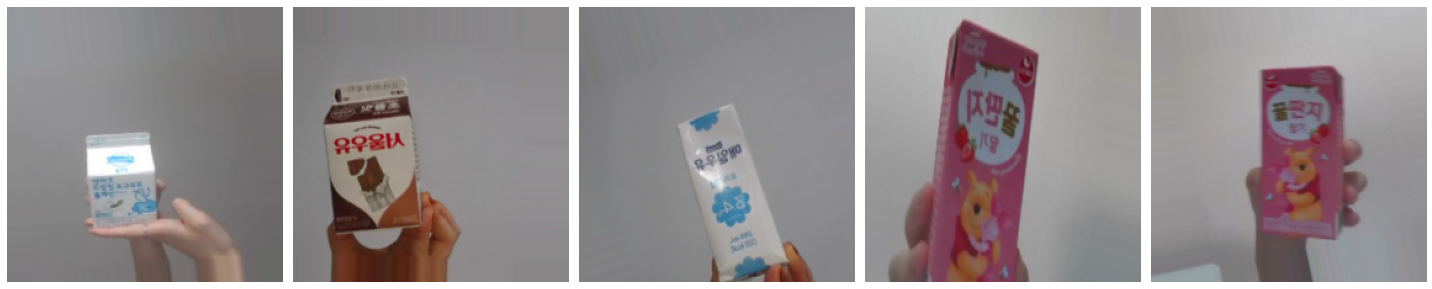

In [ ]:
# 현실에 있을만한 데이터인지 확인하면서 파라미터를 조정해야한다.

original_generator_images, _ = next(original_generator)
train_generator_images, _ = next(train_generator)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(original_generator_images[:5])
plotImages(train_generator_images[:5])

# next 함수는 데이터셋의 배치를 반환한다 
# next 함수의 반환값은 (x, y) 형태이다
# 여기서 x는 학습 특징들(픽셀값)이고 y는 라벨이다
# 학습 데이터만 보여주기 위해서 라벨은 숨긴다

In [6]:
# validation data 생성

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        PATH + 'pack_mini/val',
        target_size=(224, 224),    
        class_mode='categorical',
        batch_size=10)

Found 246 images belonging to 12 classes.


## Builde a CNN Model

In [7]:
# CNN 모델 만들기
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    
    # This is the first convolution layer
    # 컨볼루션 필터의 수, 컨볼루션 커널(=필터)의 (행, 열), 경계 처리 방법, 활성화함수, 첫 레이어일 때만 정의(input_shape)
    tf.keras.layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    # pooling layer. 필터의 (행,열)
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution layer
    tf.keras.layers.Conv2D(64, (3, 3),padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  # ----------------------------------------------------------------------- 여기까지가 이미지의 특징을 잘 추출할 수 있도록 학습되는 부분. (특징 추출 부분)
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(12, activation='softmax')
])
# ---------------------------------------------------------- 이미지를 분류하는 부분

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

In [9]:
# 모델 엮기
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
# 모델 학습

start = datetime.datetime.now()
history = model.fit(
      train_generator, 
      steps_per_epoch=10,  
      epochs=30,
      verbose=1,
      validation_data=validation_generator
      )
end = datetime.datetime.now()
time = end - start
print(f'학습시간 : ', time)

Epoch 1/30
10/10 [==============================] - 312s 28s/step - loss: 2.1408 - accuracy: 0.2795 - val_loss: 2.4603 - val_accuracy: 0.0854
Epoch 2/30
10/10 [==============================] - 140s 14s/step - loss: 1.5770 - accuracy: 0.5402 - val_loss: 2.4580 - val_accuracy: 0.0813
Epoch 3/30
10/10 [==============================] - 67s 7s/step - loss: 1.1947 - accuracy: 0.7150 - val_loss: 2.4453 - val_accuracy: 0.0813
Epoch 4/30
10/10 [==============================] - 35s 4s/step - loss: 1.0138 - accuracy: 0.7609 - val_loss: 2.4310 - val_accuracy: 0.1545
Epoch 5/30
10/10 [==============================] - 28s 3s/step - loss: 0.8409 - accuracy: 0.8336 - val_loss: 2.3998 - val_accuracy: 0.1179
Epoch 6/30
10/10 [==============================] - 22s 2s/step - loss: 0.7309 - accuracy: 0.8664 - val_loss: 2.3018 - val_accuracy: 0.3293
Epoch 7/30
10/10 [==============================] - 21s 2s/step - loss: 0.6763 - accuracy: 0.8789 - val_loss: 2.3117 - val_accuracy: 0.2195
Epoch 8/30
10/10

In [11]:
# 모델 저장하기
model.save('CNN_pack.h5')

In [13]:
# teset data 준비
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        PATH + 'pack_mini/test',
        target_size=(224, 224),
        class_mode='categorical', shuffle=False, seed=0)

Found 24 images belonging to 12 classes.


In [14]:
# test 결과 확인
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print()
print("-- Predict --")

output = model.predict_generator(test_generator)
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

print(test_generator.class_indices)
print(output)
print(test_generator.filenames)

-- Evaluate --
accuracy: 12.50%

-- Predict --
{'almond': 0, 'drinking_berrymix': 1, 'drinking_plain': 2, 'drinking_strawberry': 3, 'honeymilk_choco': 4, 'honeymilk_strawberry': 5, 'hush': 6, 'juicy': 7, 'mae_il': 8, 'seoul_choco': 9, 'seoul_coffee': 10, 'seoul_straw': 11}
[[0.010 0.015 0.104 0.006 0.515 0.036 0.017 0.104 0.103 0.016 0.012 0.060]
 [0.018 0.039 0.258 0.008 0.169 0.063 0.022 0.086 0.095 0.045 0.028 0.168]
 [0.011 0.043 0.122 0.013 0.155 0.064 0.016 0.334 0.048 0.030 0.033 0.131]
 [0.012 0.024 0.071 0.012 0.295 0.037 0.021 0.344 0.076 0.025 0.018 0.066]
 [0.014 0.021 0.067 0.013 0.241 0.033 0.026 0.392 0.077 0.021 0.018 0.077]
 [0.012 0.013 0.021 0.006 0.764 0.025 0.013 0.072 0.037 0.009 0.004 0.025]
 [0.009 0.053 0.312 0.007 0.150 0.042 0.021 0.179 0.060 0.020 0.024 0.123]
 [0.013 0.129 0.199 0.009 0.118 0.053 0.021 0.250 0.035 0.037 0.019 0.115]
 [0.021 0.141 0.098 0.011 0.321 0.089 0.021 0.170 0.020 0.045 0.011 0.053]
 [0.035 0.260 0.067 0.013 0.105 0.067 0.020 0.187 0

# RAMYEON 모델 생성

## 데이터 준비

In [15]:
# train data 생성하기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# https://tykimos.github.io/2017/06/10/CNN_Data_Augmentation/ 파라미터 설명

train_datagen = ImageDataGenerator(rescale = 1./255, # 픽셀 값 정규화
                                  rotation_range = 30, # 이미지 회전
                                  width_shift_range=0.1, # 수평방향으로 이동
                                  height_shift_range=0.1, # 수직방향으로 이동
                                  shear_range=0.2, 
                                  zoom_range=0.3,# 이미지를 확대/축소
                                  horizontal_flip=True,# 수평방향(좌우)로 뒤집기
                                  vertical_flip=False, # 수직방향(상하)로 뒤집기
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        PATH + 'ramyeon_mini/train',  
        target_size=(224, 224),  
        batch_size=128, 
        class_mode='categorical')

Found 2559 images belonging to 12 classes.


In [16]:
# validation data 생성

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        PATH + 'ramyeon_mini/val',
        target_size=(224, 224),    
        class_mode='categorical',
        batch_size=10)

Found 234 images belonging to 12 classes.


In [17]:
# CNN 모델 만들기
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    
    # This is the first convolution layer
    # 컨볼루션 필터의 수, 컨볼루션 커널(=필터)의 (행, 열), 경계 처리 방법, 활성화함수, 첫 레이어일 때만 정의(input_shape)
    tf.keras.layers.Conv2D(32, (3, 3), padding='valid', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # pooling layer. 필터의 (행,열)
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution layer
    tf.keras.layers.Conv2D(64, (3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  # ----------------------------------------------------------------------- 여기까지가 이미지의 특징을 잘 추출할 수 있도록 학습되는 부분. (특징 추출 부분)
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])
# ---------------------------------------------------------- 이미지를 분류하는 부분

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
activation_4 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
activation_5 (Activation)    (None, 109, 109, 64)     

In [20]:
# 모델 엮기
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
# 모델 학습
start = datetime.datetime.now()
history = model.fit(
      train_generator, 
      steps_per_epoch=20,  
      epochs=20,
      verbose=1,
      validation_data=validation_generator
      )
end = datetime.datetime.now()
time = end - start
print(f'학습시간 : ', time)

Epoch 1/20
20/20 [==============================] - 697s 35s/step - loss: 1.5047 - accuracy: 0.4556 - val_loss: 2.9954 - val_accuracy: 0.1111
Epoch 2/20
20/20 [==============================] - 37s 2s/step - loss: 0.1188 - accuracy: 0.9762 - val_loss: 3.4935 - val_accuracy: 0.1068
Epoch 3/20
20/20 [==============================] - 38s 2s/step - loss: 0.1433 - accuracy: 0.9574 - val_loss: 2.7580 - val_accuracy: 0.2051
Epoch 4/20
20/20 [==============================] - 38s 2s/step - loss: 0.0570 - accuracy: 0.9859 - val_loss: 2.7353 - val_accuracy: 0.2692
Epoch 5/20
20/20 [==============================] - 37s 2s/step - loss: 0.0328 - accuracy: 0.9906 - val_loss: 4.6378 - val_accuracy: 0.1453
Epoch 6/20
20/20 [==============================] - 38s 2s/step - loss: 0.0331 - accuracy: 0.9941 - val_loss: 3.8600 - val_accuracy: 0.0855
Epoch 7/20
20/20 [==============================] - 38s 2s/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 3.2903 - val_accuracy: 0.1624
Epoch 8/20
20/20 [

In [25]:
# 모델 저장
model.save('CNN_ramyeon.h5')

In [27]:
# teset data 준비
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        PATH + 'ramyeon_mini/test',
        target_size=(224, 224),
        class_mode='categorical', shuffle=False, seed=0)

Found 24 images belonging to 12 classes.


In [28]:
# test 결과 확인
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print()
print("-- Predict --")

output = model.predict_generator(test_generator)
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

print(test_generator.class_indices)
print(output)
print(test_generator.filenames)

-- Evaluate --
accuracy: 20.83%

-- Predict --
{'bul_dak': 0, 'cham_kkae': 1, 'cheese': 2, 'jin_hot': 3, 'jin_sun': 4, 'neo_gu_ri': 5, 'sa_ri': 6, 'sae_u_tang': 7, 'snack': 8, 'woo_dong': 9, 'yeul': 10, 'yuk_gae_jang': 11}
[[0.932 0.000 0.000 0.000 0.004 0.000 0.018 0.005 0.000 0.041 0.000 0.000]
 [0.001 0.000 0.001 0.000 0.165 0.000 0.815 0.000 0.000 0.013 0.004 0.002]
 [0.000 0.000 0.000 0.000 0.116 0.000 0.000 0.000 0.884 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.002 0.000 0.020 0.000 0.977 0.000 0.000 0.001]
 [0.000 0.006 0.982 0.000 0.004 0.000 0.000 0.000 0.008 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.898 0.000 0.039 0.000 0.000 0.000 0.063 0.000 0.000 0.000]
 [0.000 0.000 0.001 0.997 0.000 0.000 0.000 0.000 0.001 0.001 0.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.999 0.000 0.000 0.000]
 [0.045 0.000 0.011 0.001 0